На сегодня (16 число)

Функция генерации определенного количества СВ (для каждого закона)

Количество элементов в выборке: 
1. 10
2. 100
3. 1000
4. 10000
5. 100000
6. 1000000

Для выборок посчитать оценки:
1. мат ожиадание
2. ско в двух видах (смещенная и несмещенная)
3. медиана

Представление в виде: 
На одной плоскости рядом строим 2 графика. 
1. Анимация гистограммы распределения
2. Анимация зависимости количества элементов в графике от математического ожидания

Вторая часть (на следующую пару)
1. добавить шум (по этому же закону и по другому)
2. посчитать корреляцию и ковариацию для исходного и зашумленного ряда


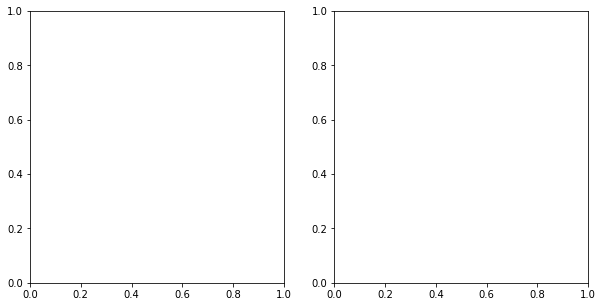

In [1]:
import scipy.stats as sps
import scipy.ndimage as snd
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

title = ax.set_title("")


In [2]:
def generateBinomRandomVariables(n, p, s):
    binom_rvs = sps.binom.rvs(n, p, size=s)
    # oned_rvs = np.array(binom_rvs.)
    mean = binom_rvs.mean()
    print('M(X) = ', mean)
    print('sigma(X)', binom_rvs.std())
    print('Median = ', snd.median(binom_rvs))
    print('Size =', s)
    print('---------------------')
    
    ax.set_ylabel('Частота появления X')
    ax.set_xlabel('Значение X')

    return binom_rvs, mean

In [15]:
sizes = [10, 100, 1000, 10000, 100000, 10000000]
means = []
x_means = []

def animate(curr):
    # mean_line = fargs[0]
    n, p = 10, 0.5
    ax.clear()
    ax2.clear()
    # title.set_text("Биномиальное распределение Размер выборки = {0:4d}".format(sizes[n]))
    rvs, mean = generateBinomRandomVariables(10, 0.5, sizes[curr])
    means.append(mean)
    # x_means.append(sizes[n])
    
    # unique_numbers = list(set(rvs))
    # bins_amount = len(unique_numbers)
    ax.hist(rvs, density=True, bins=10)
    min_ = min(means)
    max_ = max(means)
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.binom(n, p).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, sizes)))

In [16]:
from matplotlib import rc
from matplotlib import animation

means = []
x_means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

M(X) =  5.1
sigma(X) 1.374772708486752
Median =  4.5
Size = 10
---------------------
M(X) =  3.9
sigma(X) 1.9209372712298547
Median =  3.5
Size = 10
---------------------
M(X) =  4.8
sigma(X) 1.593737745050923
Median =  5.0
Size = 100
---------------------


C:\Users\balle\AppData\Local\Temp\ipykernel_4908\3352520445.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, sizes)))


M(X) =  5.027
sigma(X) 1.5793261221166452
Median =  5.0
Size = 1000
---------------------
M(X) =  5.0008
sigma(X) 1.5621137474588715
Median =  5.0
Size = 10000
---------------------
M(X) =  5.00076
sigma(X) 1.5760899157091262
Median =  5.0
Size = 100000
---------------------
M(X) =  4.9997088
sigma(X) 1.580341771643893
Median =  5.0
Size = 10000000
---------------------


In [5]:
def generateBernulliRandomVariables(p, s):
    bernoulli_rvs = sps.bernoulli.rvs(p, size=s)
    print('M(X) = %.5f' % bernoulli_rvs.mean())
    print('sigma(X) %.5f' % bernoulli_rvs.std())
    print('Median = ', snd.median(bernoulli_rvs))
    fig, ax = plt.subplots(1, 1)
    ax.hist(bernoulli_rvs)
    # return bernoulli_rvs

M(X) = 0.50200
sigma(X) 0.50000
Median =  1.0


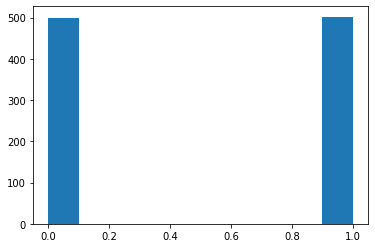

In [6]:
generateBernulliRandomVariables(0.5, 1000)

In [7]:
# p - вероятность успеха в испытании
# size - количество генерируемых СВ (размер выборки)
def generateGeomRandomVariables(p, s):
    geom_rvs = sps.geom.rvs(p, size=s)
    print('M(X) = ', geom_rvs.mean())
    print('sigma(X) = ',  geom_rvs.std())
    print('Median = ', snd.median(geom_rvs))
    fig, ax = plt.subplots(1, 1)
    ax.plot(geom_rvs)
    return geom_rvs

M(X) =  1.9
sigma(X) =  1.2206555615733703
Median =  1.5


array([1, 1, 3, 1, 1, 2, 2, 1, 5, 2])

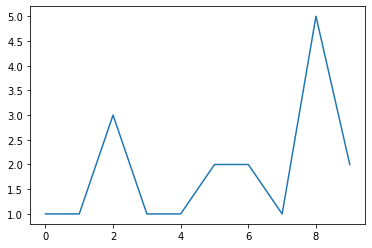

In [8]:
generateGeomRandomVariables(0.5, 10)

In [9]:
# M(X) = mu, D(X) = mu 
# size - количество генерируемых СВ (размер выборки)
def generatePoissonRandomVariables(mu, s):
    poisson_rvs = sps.poisson.rvs(mu, size=s)
    print('M(X) = ', poisson_rvs.mean())
    print('sigma(X) =', poisson_rvs.std())
    print('Median = ', snd.median(poisson_rvs))
    fig, ax = plt.subplots(1, 1)
    ax.plot(poisson_rvs)
    # return poisson_rvs

M(X) =  0.412
sigma(X) = 0.6544127138129271
Median =  0.0


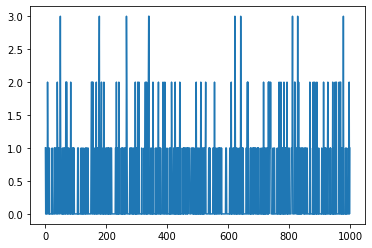

In [10]:
generatePoissonRandomVariables(0.4, 1000)

In [11]:
def generateExponentialRandomVariables(s):
    expon_rvs = sps.expon.rvs(size=s)
    print('M(X) = ', expon_rvs.mean())
    print('sigma(X) =', expon_rvs.std())
    print('Median = ', snd.median(expon_rvs))
    fig, ax = plt.subplots(1, 1)
    #ppf - percent point function 
    x = np.linspace(sps.expon.ppf(0.01),
                sps.expon.ppf(0.99), s)
    ax.plot(x, sps.expon.pdf(x),
       'r-', lw=5, label='expon pdf')
    # ax.plot(expon_rvs)
    ax.hist(expon_rvs, density=True, label='hist')
    ax.legend()
    plt.show()
    # return expon_rvs

M(X) =  1.003496357127205
sigma(X) = 0.9518582843590983
Median =  0.709945237656667


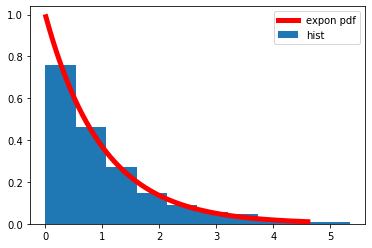

In [12]:
generateExponentialRandomVariables(1000)